In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from finitedmrgrhomagn import finite_system_algorithm,Block,model_d
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs,eigsh
from scipy.sparse import kron, identity
from permutations import get_dicts, rho_3,g_s,rho_3new,rho_2new
import qutip as q
import pickle 
import os
from IPython.display import Audio

sound_file=os.path.basename("C:Users/alfre/Ergotropy/logbook_and_notebooks/Exclamation.wav")

In [2]:
lambdarange=np.linspace(0.1,2)

In [3]:
%load_ext autoreload
%autoreload

dic,perm=get_dicts()

g=g_s(lambdarange)

rho_dic_theo={}
for l in lambdarange:
    rho_dic_theo[l]=rho_2new(dic,perm,g,l)


In [4]:
sX = np.array([[0, 1], [1, 0]], dtype='d') 

rho_dic_exp={}

def H2(Sx1, Sx2):  # two-site part of H
    
    return -0.5*(kron(Sx1, Sx2.conjugate().transpose()))

for lam in lambdarange:
    
    H1 = -0.5*lam*np.array([[1, 0], [0, -1]], dtype='d')
    
    #-h*np.array([[0, 1], [1, 0]], dtype='d') # single-site portion of H 

    site = Block(length=1, basis_size=model_d, operator_dict={
        "H": H1,
        "conn_Sx": sX,
        })

    rho_dic_exp[lam]=finite_system_algorithm(site,site,H2,L=30, m_warmup=10, m_sweep_list=[10,20,20,30])
Audio(filename=sound_file,autoplay=True)

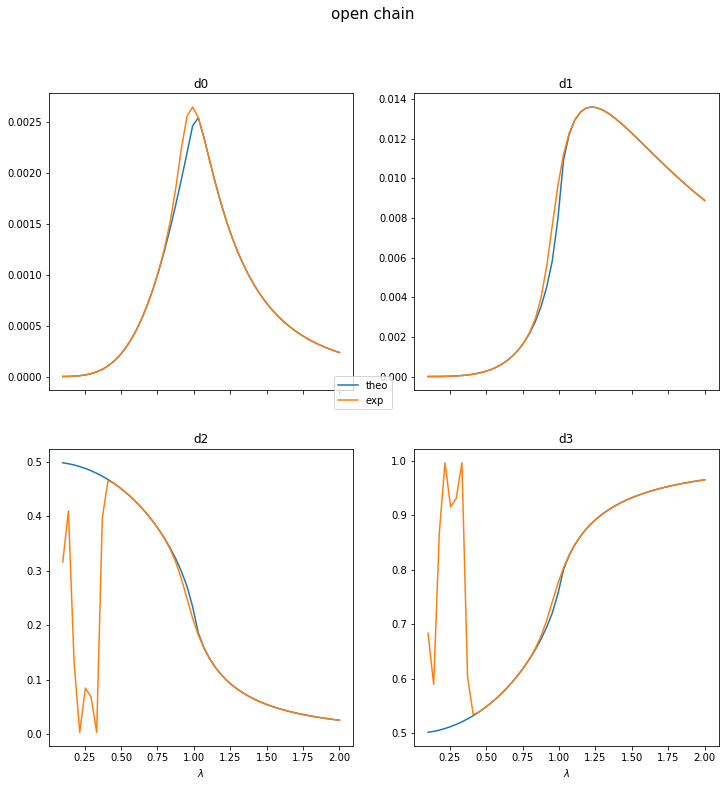

In [5]:
fig, axs = plt.subplots(2, 2,sharex=True,figsize=[12,12])

ind=[(x,y) for x in range(2) for y in range(2)]

for k in range(4):

    specvec= np.zeros_like(lambdarange)
    theovec=np.zeros_like(lambdarange)

    for i,el in enumerate(lambdarange):
        specvec[i]=np.sort(eigvalsh(rho_dic_exp[el]))[k]
        
        theovec[i]=np.sort(eigvalsh(rho_dic_theo[el]))[k]

    axs[ind[k]].plot(lambdarange,theovec,label="theo")
    axs[ind[k]].plot(lambdarange,specvec,label="exp")
    axs[ind[k]].set_title('d'+str(k))
handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center')
fig.suptitle(r"open chain",fontsize=15)
axs[1,1].set_xlabel(r"$\lambda$")
axs[1,0].set_xlabel(r"$\lambda$")
plt.show()    